### Student ID: 18195067
### Student Name: Abhijit Sinha

# Task 4  (CE6002) : Linear regression
*Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible fit to the data set Task4.csv. Your regression performance should improve if you add some new features..*

*Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split

In [2]:
# Read the Task4 csv file using pandas library
df = pd.read_csv("./Task4.csv")

In [3]:
df.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [4]:
df.tail()

,X,y
95,0.96,0.685
96,0.97,0.649
97,0.98,0.662
98,0.99,0.633
99,1.00,0.571


In [5]:
df.describe()

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


### A. Reusing the functions from Task-3 notebook and making it suitable Linear regression

References: 
1. Error calculation: https://machinelearningmastery.com/implement-machine-learning-algorithm-performance-metrics-scratch-python/

In [6]:
def get_weights(X, y):
    # Function to find the weight matrix    
    weight_matrix = np.zeros(1 + X.shape[1])
    pseudo_inv_matrix = np.linalg.pinv(X)
    weight_matrix = pseudo_inv_matrix.dot(y)
    return weight_matrix


def y_hat(X, weight_matrix):
    # Function to calculate the y_hat
    return (np.dot(X, np.transpose(weight_matrix)))


def calc_MSE(actual, predicted):
    # Function to calculate the Mean squared error
    mse = np.mean((actual - predicted)**2)
    return mse


def get_slope(X, weights):
    # Function to get the regression line for polynomial features
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 


def linear_regression(X, y, title):
    # Function to calulate the weights and plot the regression curve
    
    # Create the constant bias term and add to the input data
    bias = np.ones(len(X))
    X = np.c_[bias, X]
    print("Input X shape", X.shape)
    
    # Split data in train and test set with 20% samples as test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=y, random_state=42)

    # Get the weights from the train data
    weights = get_weights(X_train, y_train)
    print("Weights:", weights)
    
    # Calculate the mean-square error on the train data
    y_train_pred = y_hat(X_train, weights)
    train_error = calc_MSE(y_train, y_train_pred) 
    print("Ein:", train_error) 
    
    # Calculate the mean-square error on the test data
    y_test_pred = y_hat(X_test, weights)
    test_error = calc_MSE(y_test, y_test_pred) 
    print("Eout:", test_error) 
    
    plot_regression_curve(X_train, X_test, y_train, y_test, weights, title)


In [7]:
def plot_regression_curve(X_train, X_test, y_train, y_test, weights, title):
    
    # Create figure for plotting regression on train and test data
    plt.subplots(1, 2, figsize=(15, 5))   
    
    plt.subplot(1,2,1)
    plt.title('Linear Regression on train data: {}'.format(title))   
    # Plot the train data samples
    plt.scatter(X_train[:,1], y_train, c='cyan', marker='o', s=50, edgecolors='m', label='Train samples') 
    
    # Getting the X and Y position from test data
    x_min, x_max = X_train.min(), X_train.max() 
    x_line = np.linspace(x_min, x_max, X_train.shape[0])
    y_line = get_slope(x_line, weights)
   
    # Plot the regression curve on train data
    plt.scatter(x_line, y_line, c='r', marker='x', label="y_hat_train")  
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    
    
    plt.subplot(1,2,2)
    plt.title('Linear Regression on test data: {}'.format(title))
    # Plot the test data samples
    plt.scatter(X_test[:,1], y_test, c='cyan', marker='o', s=50, edgecolors='m', label='Test samples') 
    
    # Getting the X and Y position from test data
    x_min, x_max = X_test.min(), X_test.max() 
    x_line = np.linspace(x_min, x_max, X_test.shape[0])
    y_line = get_slope(x_line, weights)
    
    # Plot the regression curve on test data
    plt.scatter(x_line, y_line, c='r', marker='x', label="y_hat_test")  
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.show()

## Linear Regression

### B. Use this to obtain the best possible regression of the data set Task4.csv.
- Your regression performance should improve if you add some new features.

#### Linear Regression on X 

In [8]:
# Get the values of X and y from dataframe
X = df.X.values
y = df.y.values

Input X shape (100, 2)
Weights: [0.42876122 0.72390652]
Ein: 0.10531853019538022
Eout: 0.09353840638313976


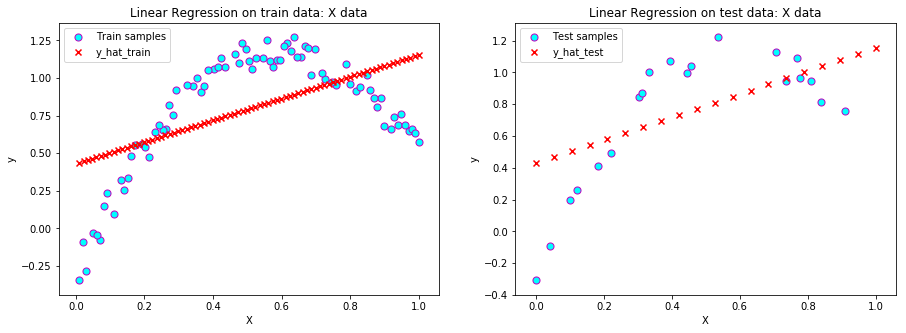

In [9]:
linear_regression(X, y, title='X data')

#### Linear Regression on X^2 data

Input X shape (100, 2)
Weights: [0.6588306  0.40547111]
Ein: 0.13438021495296687
Eout: 0.13945917157624488


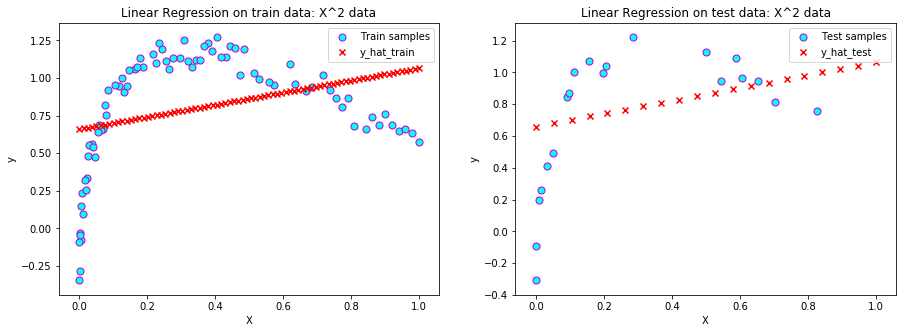

In [10]:
# Square the input data
X_sqr = np.square(X)

linear_regression(X_sqr, y, title='X^2 data')

#### Linear Regression on X and X^2 data combined

Input X shape (100, 3)
Weights: [-0.28548779  4.89446178 -4.09325841]
Ein: 0.005046331718340467
Eout: 0.004870265424297493


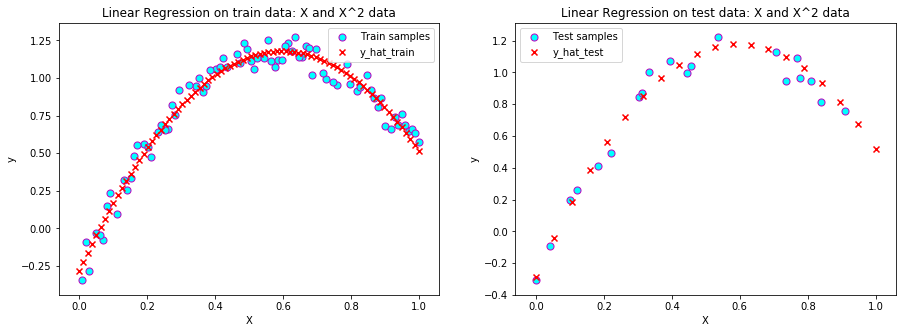

In [11]:
# Create the input with X and X^2 features
X_input = np.c_[X, X_sqr]

linear_regression(X_input, y, title='X and X^2 data')

#### Linear Regression on X, X^2 and X^3 data combined

Input X shape (100, 4)
Weights: [-0.35688358  5.73514927 -6.15249864  1.34627111]
Ein: 0.00438269733687105
Eout: 0.0045586092710415


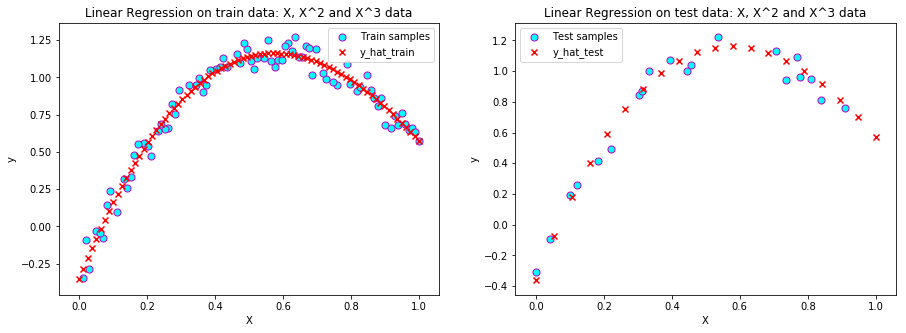

In [12]:
# Cube the input data
X_cube = np.power(X, 3)

# Create the input with constant X, X^2 and X^3 features
X_input = np.c_[X, X_sqr, X_cube]

linear_regression(X_input, y, title='X, X^2 and X^3 data')

### Observations:

The Mean Squared error is very low if we use the combined data of X+X^2+X^3 in the new features space for the linear regression. The error is high if we just use X or X square values individually.

There is slight improvement if we go higher in the order of data but we will be increasing the VC dimension in that case.

Below is the summary of features used w.r.t regression error:

|Features used| Mean Squared Error on Test Data   |
|----------------|---------------|
|Only X|0.093|
|Only X^2|0.139|
|Combination of X and X^2|0.0049|
|Combination of X, X^2 and X^3|0.0045|

### C. Use an algorithm from the scikit-learn toolbox to see if you can do better

Note: You should not add any other imports than those necessary for your chosen scikit-learn algorithm.

Reference: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

### Scikit-learn Linear Regression:

In [13]:
from sklearn.linear_model import LinearRegression

def scikit_linear_regression(X, y, title=''):
    # Split data in train and test set with 20% samples as test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lm = LinearRegression()

    # Fit the model with training data
    model = lm.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = lm.predict(X_test)
    score = model.score(X_test, y_test)

    # Plot the regression curve on test data
    plt.figure(figsize=(6, 5))
    plt.scatter(X_test, y_test, c='cyan', edgecolors='m', label='Samples')
    plt.scatter(X_test, predictions, c='blue', marker='x', label='Model')

    # Print the R2 score: the percentage of explained variance of the predictions
    plt.title(title + '; R2 score={:.4f}'.format(score))
    plt.legend(loc="best")
    plt.show()

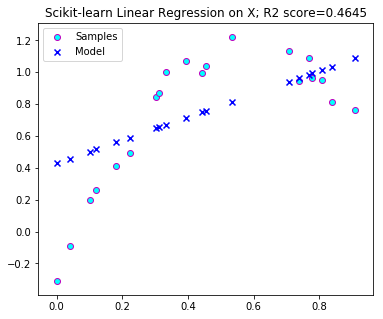

In [14]:
# Try scikit-learn linear regression on X
X_reg = X.reshape(-1,1)

scikit_linear_regression(X_reg, y, title='Scikit-learn Linear Regression on X')

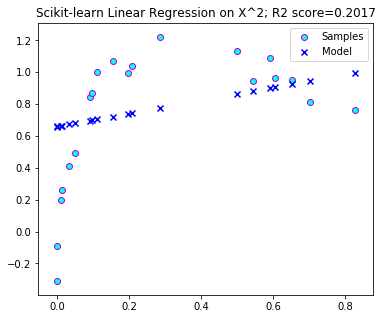

In [15]:
# Applying scikit-learn linear regression on X^2
X_sq = np.square(X).reshape(-1,1)

scikit_linear_regression(X_sq, y, title='Scikit-learn Linear Regression on X^2')

###  Observation of scikit-learn Linear Regression :
On using the scikit-learn Linear Regression on original data X and X^2, we don't get the best result! The error is reduced with squared features of X but still its not the best result.

It worth trying various polynomial orders of X and then applying Linear Regression. The polynomial features are used below.

### Using feature transformation from scikit-learn
Using pipeline method to build Polynomial features and test with Linear Regression systematically

Reference: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
2. https://www.jeremyjordan.me/polynomial-regression/
3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

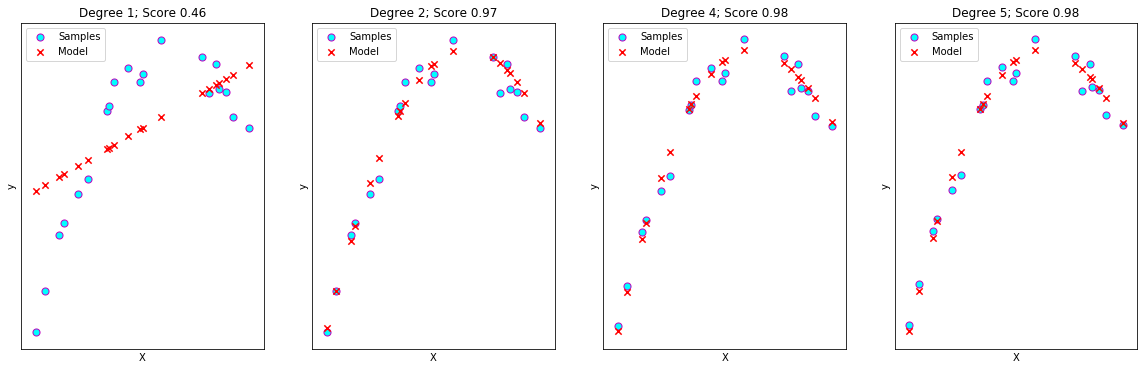

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Choose the degree of ploynomial order selection
degrees = [1, 2, 4, 5]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y, test_size=0.2, random_state=42)

plt.figure(figsize=(20, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    
    predictions = pipeline.predict(X_test)
    score = pipeline.score(X_test, y_test)
    
    plt.scatter(X_test, y_test, c='cyan', edgecolors='m', s=50, label="Samples")
    plt.scatter(X_test, predictions, c='r', marker='x', s=40, label="Model")

    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}; Score {:.2f}".format(degrees[i], score))
plt.show()

### Observation:
The higher the polynomial order of the features the Linear regression performance gets better. We need to be aware that with more features we are increasing the VC dimension and going away from generalization on unseen data. We are also indulging in data snooping to fit the data in hand by trying various polynomial order.